# 📘 Machine Learning 2025/2026  

# Laboratorio 6.1 — Generalized Linear Models e Famiglia Esponenziale  
### Docenti: Danilo Croce, Giorgio Gambosi  

---
**Disclaimer**: alcune formulazioni presentate in questi appunti adottano lievi semplificazioni (ad esempio l’omissione esplicita della funzione log-normalizzante $A(\eta)$ o la rappresentazione ridotta del caso Gaussiano) con l’unico scopo di rendere più chiari i concetti fondamentali sui GLM; per la trattazione rigorosa si rimanda alla notazione completa utilizzata sul libro di testo (sezione 2.4).

---

# 1️⃣ Perché i GLM?  
In machine learning vogliamo modellare **come è generato il dato target** $y$ a partire da un input $x$.  
Esempi:

- regressione: $y\in\mathbb{R}$
- classificazione binaria: $y \in \{0,1\}$
- classificazione multiclasse: $y \in \{1,\dots,K\}$
- conteggi: $y \in \mathbb{N}$

I GLM forniscono *un'unica struttura matematica* che genera:

- regressione lineare  
- regressione logistica  
- softmax regression  
- regressione di Poisson  

Sono **tutti lo stesso modello**, applicato a distribuzioni diverse.

---

# 2️⃣ Famiglia esponenziale

Molte distribuzioni usate in ML possono essere scritte nella forma:

$$
p(y \mid \eta) = h(y)\, g(\eta)\, \exp\big( \eta^T u(y) \big)
$$

dove:

| Simbolo | Significato |
|--------|-------------|
| $y$ | variabile osservata |
| $\eta$ | **parametro naturale** della distribuzione |
| $u(y)$ | **statistica sufficiente** |
| $h(y)$ | parte che dipende solo da $y$ |
| $g(\eta)$ | parte che dipende solo da $\eta$ |


Molte distribuzioni usate nei modelli statistici e nel machine learning possono essere scritte nella forma:

$$
p(y \mid \eta) = h(y)\, g(\eta)\, \exp\!\big(\eta^T u(y)\big)
$$

Questa decomposizione non è un esercizio formale: permette di capire **quali parti del dato e del modello contano realmente per l’apprendimento**.  
Ecco la funzione operativa di ciascun termine.

### 1. $u(y)$ — Statistica sufficiente  
Rappresenta **la parte del dato che contiene tutta l’informazione rilevante** per stimare i parametri.

- Bernoulli → $u(y)=y$ (basta sapere se l’osservazione è 0 o 1)  
- Multinomiale → vettore one-hot (serve la classe)  
- Poisson → $u(y)=y$ (serve il conteggio)

**Ruolo pratico:** determina la struttura del **gradiente**.  
Tutti i GLM hanno:

$$
\nabla \ell(w) = X^T \big(u(y) - \mu(x)\big)
$$

Cambiare distribuzione = cambiare $u(y)$ = cambiare la loss e il comportamento del modello.

### 2. $\eta$ — Parametro naturale  
È il parametro “giusto” in cui la distribuzione è più semplice.  
Nei GLM imponiamo:

$$
\eta(x) = w^T x
$$

Questa è la chiave: qualunque sia il problema (classificazione, conteggi, regressione), la complessità si concentra in $\eta$, mentre l’architettura è sempre lineare.

**Ruolo pratico:**  
- consente di usare **lo stesso schema di ottimizzazione** per problemi diversi  
- permette di derivare automaticamente la **link function** e la trasformazione finale (sigmoid, softmax, exp, identità)

### 3. $h(y)$ — Termine che dipende solo dal dato  
Contiene tutto ciò che riguarda esclusivamente l’osservazione, non i parametri.

**Ruolo pratico:**  
Quando si calcola log-likelihood, gradiente e Hessiana, $h(y)$ scompare.  
Non influisce sull’addestramento.

Esempio: nella Gaussiana, il termine $e^{-y^2/(2\sigma^2)}$ è irrilevante per l’ottimizzazione.

### 4. $g(\eta)$ — Normalizzazione  
Assicura che $p(y\mid\eta)$ sia una distribuzione valida (somma/integrale = 1).  
È anche ciò che definisce la **funzione di attivazione** usata dal modello.

Esempi:
- Bernoulli → sigmoid  
- Multinomiale → softmax  
- Poisson → esponenziale  
- Gaussiana → identità

**Ruolo pratico:**  
Stabilisce la forma della previsione $\mu(x)$, quindi la natura del problema (probabilità, rate, valore reale).

---

## Perché questa decomposizione è utile?

### ✔ 1. La scelta della distribuzione determina la loss
- Gaussiana → MSE  
- Bernoulli → cross-entropy  
- Multinomiale → softmax cross-entropy  
- Poisson → Poisson loss

Non serve inventare la loss: è già contenuta nella forma esponenziale.


### ✔ 2. Tutti i GLM hanno la stessa struttura di gradiente  
Indipendentemente dal tipo di dato:

$$
\nabla \ell(w) = X^T (u(y) - \mu(x))
$$

Questo uniforma l’ottimizzazione.


## ✔ 3. Chiarisce perché funzioni come sigmoid e softmax compaiono naturalmente  
Non sono scelte arbitrariamente:  
emergono da $g(\eta)$ e dalla necessità di normalizzare la distribuzione.


## ✔ 4. Collega direttamente compiti differenti  
Classificazione binaria, multiclasse, regressione, conteggi:  
tutti si ottengono cambiando solo:

- la distribuzione  
- il parametro naturale  
- la statistica sufficiente  

Il resto (ottimizzazione, architettura lineare, forma del gradiente) è condiviso.

# In sintesi

La forma esponenziale non è un dettaglio teorico:  
fornisce **una struttura unificata** per capire, progettare e allenare modelli probabilistici lineari.

- $u(y)$ → cosa del dato serve al modello  
- $\eta$ → come il modello “vede” l’input  
- $h(y)$ → cosa può essere ignorato nell’ottimizzazione  
- $g(\eta)$ → forma dell’output e della loss

È la base matematica dei GLM e spiega perché regressione lineare, logistica, softmax e Poisson sono in realtà **lo stesso modello** applicato a distribuzioni diverse.

---

### Intuizione
La distribuzione è riscritta come un'esponenziale di qualcosa **lineare** in una funzione di $y$.  
Ciò permette grande semplicità matematica.

### Esempi

| Distribuzione | Statistica sufficiente $u(y)$ | Parametro naturale $\eta$ |
|---------------|----------------------------------|------------------------------|
| Bernoulli | $y$ | $\log\frac{\mu}{1-\mu}$ |
| Gaussiana | $(y,\; y^2)$ | $(μ/σ², -1/(2σ²))$ |
| Poisson | $y$ | $\log\lambda$ |
| Multinomiale | vettore 1-of-K | $w_k^T x$ |

**Nota**: La Gaussiana ha due statistiche sufficienti, perché la sua densità contiene sia un termine lineare in $y$ sia uno quadratico in $y^2$.

---

# 3️⃣ Ingredienti dei GLM

Un modello è un **Generalized Linear Model** se soddisfa 3 condizioni:

1. La distribuzione di $y\mid x$ appartiene alla famiglia esponenziale  
2. La predizione è il valore atteso della statistica sufficiente  
3. Il **parametro naturale** è lineare nell’input:  
   $$
   \theta(x) = w^T x
   $$

👉 La parola “linear” si riferisce alla linearità del **parametro naturale**, non dell’output.

---

## 🔗 Link function nei GLM

Nei GLM è comodo pensare in termini di **link function**:

- indichiamo con $\mu(x)$ la media del modello, ad esempio:
  - Bernoulli: $\mu(x) = p(y=1\mid x)$
  - Gaussiana: $\mu(x) = \mathbb{E}[y\mid x] = \mu(x)$
  - Poisson: $\mu(x) = \lambda(x)$
- il **link** è una funzione $g(\cdot)$ tale che:

$$
g(\mu(x)) = \theta(x) = w^T x.
$$

Esempi:

- Gaussiana: $g(\mu) = \mu$  (link identità)
- Bernoulli (logistica): $g(\mu) = \log\frac{\mu}{1-\mu}$  (link logit)
- Poisson: $g(\mu) = \log \mu$  (link log)
- Multinomiale: il link inverso è la softmax.

In tutti i casi, il GLM collega **media** e **combinazione lineare** tramite il link:

$$
g(\mu(x)) = w^T x.
$$

### Link canonici dei principali GLM

| Distribuzione | Parametro naturale $\eta$ | Media $\mu$ | Link $g(\mu)$ | Inverse link |
|---------------|------------------------------|----------------|------------------|---------------|
| Gaussiana | $\mu/\sigma^2$ | $\mu$ | identità | identità |
| Bernoulli | $\log\frac{\mu}{1-\mu}$ | $\mu$ | logit | sigmoid |
| Poisson | $\log\lambda$ | $\lambda$ | log | esponenziale |
| Multinomiale | $\log\pi_k$ | $\pi_k$ | log-softmax | softmax |

👉 Tutti i GLM sono casi particolari di  
$$
\mu(x) = g^{-1}(w^T x).
$$

---

# 4️⃣ Gaussian GLM ⇒ Regressione lineare

Assunzione:

$$
y \mid x \sim \mathscr{N}(\mu(x), \sigma^2)
$$

Forma esponenziale → si identifica:

- statistiche sufficienti: $u₁(y) = y$ ,   $u₂(y) = y²$
- parametri naturali:
      $$η₁(x) = μ(x)/σ²$$
      $$η₂     = -1/(2σ²)$$

La predizione:

$$
y(x)=\mathbb{E}[y\mid x] = \mu(x)
$$

Vincolo GLM:

$$
\theta(x)=w^T x \quad\Rightarrow\quad \mu(x)=\sigma^2 w^T x.
$$

Riassorbendo $\sigma^2$ nei pesi:

$$
y(x)=w^T x.
$$

👉 **Risultato: Regressione lineare**

---

# 5️⃣ Bernoulli GLM ⇒ Regressione logistica

Assunzione:

$$
p(y\mid x)=\pi(x)^y (1-\pi(x))^{1-y}
$$

Forma esponenziale:

- statistica sufficiente: $u(y)=y$
- parametro naturale:  
  $$
  \theta(x)=\log\frac{\pi(x)}{1-\pi(x)}
  $$

Inversione (inverse link):

$$
\pi(x)=\sigma(\theta(x))=\frac{1}{1+e^{-\theta(x)}}
$$

Vincolo GLM:

$$
\theta(x)=w^T x
$$

Risultato:

$$
p(C_1\mid x)=\sigma(w^T x).
$$

👉 **Regressione logistica**

---

# 6️⃣ Multinomial GLM ⇒ Softmax regression

Assunzione:

$$
p(y=k\mid x)=\pi_k(x)
$$

Forma esponenziale:

- statistica sufficiente: vettore one-hot  
- parametro naturale: $\theta_k(x)=\log\mu_k$

Softmax:

$$
\pi_k(x)=\frac{\exp(\theta_k(x))}{\sum_j \exp(\theta_j(x))}
$$

Vincolo GLM:

$$
\theta_k(x)=w_k^T x
$$

Risultato:

$$
p(C_k\mid x)=\frac{e^{w_k^T x}}{\sum_j e^{w_j^T x}}.
$$

👉 **Softmax regression**

---

# 7️⃣ Poisson GLM ⇒ Poisson regression

Assunzione:

$$
p(y\mid x)=\frac{\lambda(x)^y}{y!} e^{-\lambda(x)}
$$

Forma esponenziale:

- statistica sufficiente: $u(y)=y$
- parametro naturale: $\theta(x)=\log\lambda(x)$

Vincolo GLM:

$$
\theta(x)=w^T x \quad\Rightarrow\quad \lambda(x)=e^{w^T x}.
$$

👉 **Poisson regression**

---

# 🔟 Riepilogo finale (GLM in una tabella)

| Distribuzione | Parametro naturale $\eta$ | Predizione $\mu(x)$ | Link | Modello |
|---------------|------------------------------|--------------------------|-------|---------|
| Gaussiana | $\mu/\sigma^2$ | $w^T x$ | identità | Linear Regression |
| Bernoulli | $\log\frac{\mu}{1-\mu}$ | $\sigma(w^T x)$ | logit | Logistic Regression |
| Multinomiale | $\log\mu_k$ | softmax | softmax | Softmax Regression |
| Poisson | $\log\lambda$ | $e^{w^T x}$ | log | Poisson Regression |

---

In [ ]:
# ============================================================
# 📘 GENERALIZED LINEAR MODELS — Esempi concreti
#    1) Gaussiano → Regressione lineare
#    2) Bernoulli → Regressione logistica
#    3) Poisson → Regressione di Poisson
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit   # sigmoid
from sklearn.linear_model import LinearRegression, LogisticRegression, PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

---
---
## *Vediamoli nel dettaglio*

---


# 1️⃣ Scelta della distribuzione: Gaussiana

Supponiamo che il target sia un valore reale:

$$
y \in \mathbb{R}
$$

Assumiamo che i dati siano generati da una distribuzione **Normale**:

$$
y \mid x \sim \mathscr{N}(\mu(x), \sigma^2)
$$

La sua densità è:

$$
p(y\mid x)
=
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left(
   -\frac{(y - \mu(x))^2}{2\sigma^2}
\right)
$$

Questa forma NON è ancora nella famiglia esponenziale — dobbiamo riscriverla.

---

# 2️⃣ Mettere la Gaussiana nella forma della famiglia esponenziale

La famiglia esponenziale ha questa forma generale:

$$
p(y\mid x)
=
h(y)\,
g(\theta(x))\,
\exp\!\big(
\theta(x)\, u(y)
\big)
$$

Per usare i GLM dobbiamo **obbligatoriamente** riscrivere la Gaussiana in questa forma.

---

## 2.1 Espandiamo il quadrato

Partiamo dal termine nel quadrato:

$$
(y - \mu(x))^2
= y^2 - 2y\,\mu(x) + \mu(x)^2
$$

Sostituiamolo nella formula della Gaussiana:

$$
p(y\mid x)
=
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left(
-\frac{1}{2\sigma^2}
\Big[ y^2 - 2y\mu(x) + \mu(x)^2 \Big]
\right)
$$

---

## 2.2 Separiamo i termini in $y$, $\mu$ e $y^2$

Distribuiamo la costante:

$$
p(y\mid x) =
\frac{1}{\sqrt{2\pi\sigma^2}}
\exp\!\left(
-\frac{y^2}{2\sigma^2}
+ \frac{\mu(x)}{\sigma^2} y
- \frac{\mu(x)^2}{2\sigma^2}
\right)
$$

Ora abbiamo tre pezzi:

1. $-\dfrac{y^2}{2\sigma^2}$  — dipende solo da $y$  
2. $\dfrac{\mu(x)}{\sigma^2} y$ — prodotto fra $\mu$ e $y$  
3. $-\dfrac{\mu(x)^2}{2\sigma^2}$ — dipende solo da $\mu(x)$  

---

## 2.3 Portiamo fuori ciò che NON serve nell’esponenziale

La famiglia esponenziale vuole:

- un termine con $u(y)$ dentro l'esponente  
- tutto il resto separato in funzioni $h(y)$ e $g(\theta)$

Riorganizziamo:

$$
p(y\mid x)
=
\underbrace{
\exp\!\left( -\frac{y^2}{2\sigma^2} \right)
}_{h(y)}
\cdot
\underbrace{
\exp\!\left( -\frac{\mu(x)^2}{2\sigma^2} \right)
}_{g(\theta)}
\cdot
\underbrace{
\exp\!\left( \frac{\mu(x)}{\sigma^2} y \right)
}_{\exp(\theta u(y))}
$$

Ora possiamo IDENTIFICARE i componenti della famiglia esponenziale.

---

# 3️⃣ Identificazione dei pezzi della famiglia esponenziale

### ✔ Statistica sufficiente
È la funzione di $y$ che compare moltiplicata al parametro naturale:

$$
u(y) = y
$$

### ✔ Parametro naturale  
È il coefficiente che moltiplica $u(y)$ nell'esponente:

$$
\theta(x) = \frac{\mu(x)}{\sigma^2}
$$

### ✔ Parte che dipende solo da $y$

$$
h(y) = \exp\!\left( -\frac{y^2}{2\sigma^2} \right)
$$

### ✔ Parte che dipende solo da $\theta$ (o $\mu$)

$$
g(\theta)
=
\exp\!\left(
-\frac{\mu(x)^2}{2\sigma^2}
\right)
$$

---

# 4️⃣ Passaggio fondamentale: cos’è davvero $\theta(x)$?

Dalla struttura della Gaussiana abbiamo trovato che:

$$
\boxed{
\theta(x) = \frac{\mu(x)}{\sigma^2}
}
$$

👉 cioè **il parametro naturale è proporzionale alla media**.

Questa è la chiave di tutto.

---

# 5️⃣ Applicare la definizione di GLM: linearità del parametro naturale

La definizione di GLM impone:

$$
\theta(x) = w^T x
$$

Combiniamo questa condizione con quella ottenuta prima:

$$
\frac{\mu(x)}{\sigma^2} = w^T x
$$

Ora vogliamo isolare $\mu(x)$.

---

# 6️⃣ Ricavare la media $\mu(x)$

Moltiplichiamo entrambi i lati per $\sigma^2$:

$$
\mu(x) = \sigma^2 w^T x
$$

Poiché $\sigma^2$ è costante, la possiamo assorbire nei pesi:

- definiamo un nuovo vettore:  $w' = \sigma^2 w$

Otteniamo:

$$
\mu(x) = (w')^T x
$$

Infine rinominiamo $w' \to w$ (per comodità):

$$
\boxed{
\mu(x) = w^T x
}
$$

---

# 🎉 RISULTATO: La regressione lineare è un GLM con Gaussiana

La predizione nei GLM è:

$$
y(x) = \mathbb{E}[y \mid x] = \mu(x)
$$

Sostituendo:

$$
\boxed{
y(x) = w^T x
}
$$

Questa è esattamente la **regressione lineare classica**.

---

# 🧠 Conclusione intuitiva

1. scegli la Gaussiana  
2. scopri che il suo parametro naturale è proporzionale alla media  
3. imponi che quel parametro sia lineare  
4. ottieni una media lineare  
5. la media è la predizione  

👉 **La Regressione Lineare non è altro che un GLM + Gaussiana.**

📌 Coefficienti stimati (w): [1.91579723]
📌 Bias stimato (w0): 3.1973646752317495
📉 Errore Quadratico Medio sul Test: 0.9098931536938143


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


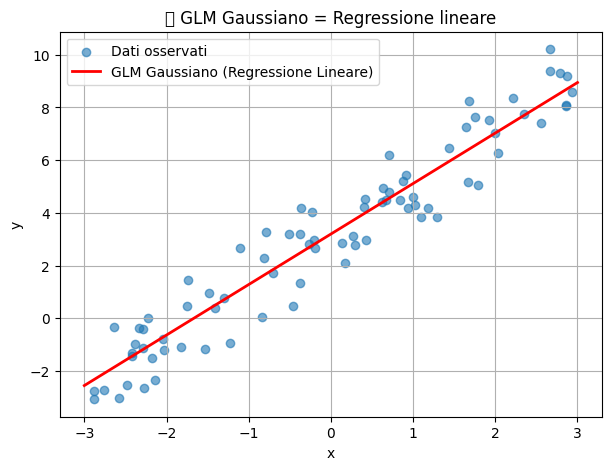

In [ ]:
# ------------------------------------------------------------
# 📘 GLM con distribuzione Gaussiana → Regressione Lineare
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------------
# 🎯 1. Generiamo dati sintetici con media lineare
#    y = 3 + 2x + rumore gaussiano
# ------------------------------------------------------------
# Questa forma corrisponde al caso teorico:
# - y|x ~ N( μ(x), σ² )
# - dove μ(x) = 3 + 2x  (vera media lineare)
# - e σ² = 1 (rumore gaussiano)

np.random.seed(0)
n = 80

X = np.random.uniform(-3, 3, size=(n, 1))
true_mean = 3 + 2 * X[:,0]                      # μ(x)
y = true_mean + np.random.normal(0, 1, size=n)  # aggiunta del rumore

# ------------------------------------------------------------
# 🧪 2. Train/Test split
# ------------------------------------------------------------
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=0)

# ------------------------------------------------------------
# 🔧 3. GLM Gaussiano con link identità
#    Nei GLM:
#       - distribuzione: Gaussiana
#       - parametro naturale: θ(x) = μ(x)/σ²
#       - link identità: μ(x) = θ(x)
#       - θ(x) = w^T x  → μ(x) = w^T x
#
# Questo coincide con LinearRegression di sklearn.
# ------------------------------------------------------------
lin = LinearRegression().fit(Xtr, ytr)

print("📌 Coefficienti stimati (w):", lin.coef_)
print("📌 Bias stimato (w0):", lin.intercept_)

# ------------------------------------------------------------
# 🔍 4. Predizione
# ------------------------------------------------------------
y_pred = lin.predict(Xte)
mse = mean_squared_error(yte, y_pred)
print("📉 Errore Quadratico Medio sul Test:", mse)

# ------------------------------------------------------------
# 📊 5. Visualizzazione
# ------------------------------------------------------------
plt.figure(figsize=(7,5))

# dati originali
plt.scatter(X, y, alpha=0.6, label="Dati osservati")

# retta stimata dal GLM
xx = np.linspace(-3, 3, 200).reshape(-1, 1)
yy = lin.predict(xx)
plt.plot(xx, yy, color="red", linewidth=2, label="GLM Gaussiano (Regressione Lineare)")

plt.title("📘 GLM Gaussiano = Regressione lineare")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 🧩 Come si arriva alla Regressione Logistica partendo dai GLM  
## (GLM Bernoulliano — spiegato passo per passo)

In un **Generalized Linear Model (GLM)** dobbiamo fare sempre le stesse 3 scelte:

1. **Distribuzione** per il dato $ y \mid x $  
2. **Parametro naturale** della distribuzione  
3. **Nesso lineare**:  
   $$
   \theta(x) = w^T x
   $$

Vediamo come queste scelte portano *inevitabilmente* alla **regressione logistica**.

---

# 1️⃣ Scelta della distribuzione: Bernoulli

Se il nostro target è **binario**, cioè:

$$
y \in \{0,1\}
$$

la distribuzione naturale è la **Bernoulli**:

$$
p(y \mid x) = \pi(x)^y (1 - \pi(x))^{1-y}
$$

dove:

- $ \pi(x) = p(y = 1 \mid x) $ è la probabilità che vogliamo predire.
- $ p(y=0 \mid x) = 1 - \pi(x) $

---

# 2️⃣ Riscrittura nella *famiglia esponenziale*

La Bernoulli appartiene alla *famiglia esponenziale*.

Partiamo dalla definizione:

$$
p(y \mid \mu) = \mu^y (1 - \mu)^{1-y}
$$

Portiamo nell’esponenziale:

$$
p(y \mid \mu)
= \exp\!\left( y\ln\mu + (1-y)\ln(1-\mu) \right)
$$

Mettiamo in evidenza il termine che moltiplica $y$:

$$
p(y\mid\mu)
= (1-\mu)\exp\left( y \ln\frac{\mu}{1-\mu} \right)
$$

Ora possiamo identificare i pezzi della famiglia esponenziale:

$$
p(y\mid x)
= h(y)\, g(\theta(x))\, \exp(\theta(x) u(y))
$$

### Identificazioni:

- **statistica sufficiente**:
  $$
  u(y) = y
  $$

- **parametro naturale**:
  $$
  \theta(x) = \ln\frac{\pi(x)}{1-\pi(x)}
  $$
  (questo è il **logit**, o *log-odds*)

- **inversione** del logit:
  $$
  \pi(x) = \frac{1}{1 + e^{-\theta(x)}} = \sigma(\theta(x))
  $$

- **funzione sigmoide**:
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

Fin qui *non abbiamo fatto ML*, solo riscritture matematiche.

---

# 3️⃣ Nesso lineare del GLM

Un GLM NON dice quale sia l’attivazione.  
Dice solo:

> “il **parametro naturale** deve essere lineare nell’input”

Per la Bernoulli il parametro naturale è il logit.

Quindi il GLM impone:

$$
\theta(x) = w^T x
$$

Sostituendo nella formula della probabilità:

$$
\pi(x) = \sigma(\theta(x))
= \sigma(w^T x)
$$

👉 questo è esattamente il modello della **regressione logistica**.

$$
p(y=1\mid x) = \frac{1}{1 + e^{-w^Tx}}
$$

---

# 🎉 Risultato finale

| Ingredienti GLM | Contribuisce a… |
|-----------------|-----------------|
| Bernoulli | distribuzione corretta per variabile binaria |
| parametro naturale = logit | forma della sigmoid |
| nesso lineare $w^T x$ | confine decisionale lineare |
| $$y(x)=\mathbb{E}[y\mid x]=\pi(x)$$ | output probabilistico |

👉 Tutto porta automaticamente alla **Regressione Logistica**.

---

# 🧪 Codice Python

Questo codice implementa esattamente il GLM Bernoulliano usando scikit-learn.



📌 Coefficiente stimato: [[1.75898891]]
📌 Bias stimato: [-1.01979569]
🎯 Accuracy sul test: 0.8888888888888888


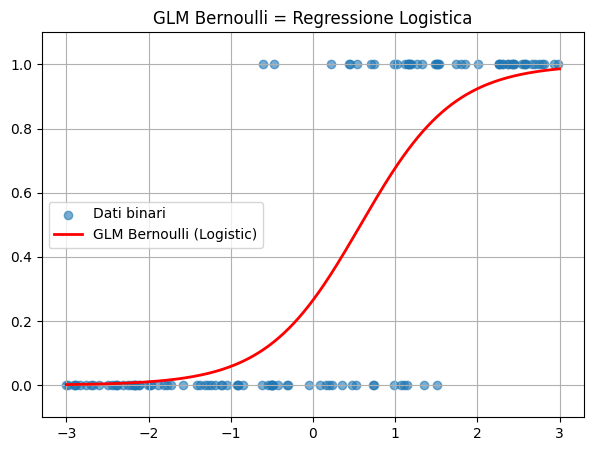

In [ ]:
# ------------------------------------------------------------
# 📘 GLM con distribuzione Bernoulli → Regressione Logistica
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.special import expit  # sigmoid

# ------------------------------------------------------------
# 🎯 1. Generiamo dati binari da un vero modello logistico
#    p(y=1 | x) = σ(-1 + 2x)
# ------------------------------------------------------------
np.random.seed(1)
n = 120

X = np.random.uniform(-3, 3, size=(n,1))

# vero logit:  θ(x) = -1 + 2x
theta_true = -1 + 2 * X[:,0]
p_true = expit(theta_true)

# campioniamo y da una Bernoulli
y = np.random.binomial(1, p_true)

# ------------------------------------------------------------
# 🧪 2. Train/test split
# ------------------------------------------------------------
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=0)

# ------------------------------------------------------------
# 🔧 3. GLM Bernoulli con link logit → LogisticRegression
# ------------------------------------------------------------
logreg = LogisticRegression().fit(Xtr, ytr)

print("📌 Coefficiente stimato:", logreg.coef_)
print("📌 Bias stimato:", logreg.intercept_)

# ------------------------------------------------------------
# 📈 4. Accuracy sul test
# ------------------------------------------------------------
y_pred = logreg.predict(Xte)
acc = accuracy_score(yte, y_pred)
print("🎯 Accuracy sul test:", acc)

# ------------------------------------------------------------
# 📊 5. Visualizzazione del modello
# ------------------------------------------------------------
xx = np.linspace(-3, 3, 300)
pp = expit(logreg.intercept_ + logreg.coef_[0][0] * xx)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.6, label="Dati binari")
plt.plot(xx, pp, color="red", label="GLM Bernoulli (Logistic)", linewidth=2)

plt.title("GLM Bernoulli = Regressione Logistica")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# 🧩 Come si arriva alla Softmax Regression partendo dai GLM  

Il caso multiclasse è un’estensione naturale del caso Bernoulliano:

- Bernoulli = 2 classi → sigmoid  
- Multinomial = K classi → softmax  

Vediamo come il modello GLM produce *automaticamente* la **softmax regression**.

---

# 1️⃣ Scelta della distribuzione: Multinomiale (Categorical)

Ora i target sono **multiclasse**:

$$
y \in \{1,2,\dots,K\}
$$

Per lavorare bene con la matematica useremo la codifica **1-of-K**:

$$
y \rightarrow t = (t_1,\dots,t_K)
$$

dove:

- $ t_k = 1 $ se l’osservazione appartiene alla classe $C_k$
- $ t_k = 0 $ altrimenti
- e:
  $$
  \sum_{k=1}^K t_k = 1
  $$

La distribuzione Multinomiale (per una sola prova) è:

$$
p(t \mid x) = \prod_{k=1}^K \pi_k(x)^{t_k}
$$

dove:

- $ \pi_k(x) = p(y = k \mid x) $
- $ \sum_{k=1}^K \pi_k(x) = 1 $

---

# 2️⃣ Riscrittura nella *famiglia esponenziale*

Partiamo da:

$$
p(t \mid x) = \prod_{k=1}^K \pi_k(x)^{t_k}
$$

Portiamo tutto nell’esponenziale:

$$
p(t \mid x)
= \exp\!\left( \sum_{k=1}^K t_k \ln \pi_k(x) \right)
$$

Ora identifichiamo i pezzi del GLM:

### Statistica sufficiente
$$
u(y) = t = (t_1,\dots,t_K)
$$

### Parametro naturale
Vogliamo riscrivere la multinomiale nella forma:

$$
p(t\mid x) = h(t)\, g(\theta(x))\, \exp(\theta(x)^T t)
$$

Per farlo, riscriviamo:

$$
\ln \pi_k(x) = \theta_k(x) - A(x)
$$

dove:

- $ \theta_k(x) $ sono i **parametri naturali**
- $ A(x) = \ln \sum_{j=1}^K e^{\theta_j(x)} $ serve per normalizzare

Sostituendo:

$$
\pi_k(x)
= \frac{e^{\theta_k(x)}}{\sum_{j=1}^K e^{\theta_j(x)}}
$$

👉 questa è esattamente la **softmax**.

---

# 3️⃣ Nesso lineare del GLM

Come sempre, il GLM impone:

$$
\theta_k(x) = w_k^T x
$$

per ogni classe $k$.

Sostituendo nella formula della softmax:

$$
p(y=k \mid x)
= \frac{e^{w_k^T x}}
       {\sum_{j=1}^K e^{w_j^T x}}
$$

👉 Ed ecco la **softmax regression** (o multinomial logistic regression).

---

# 🎉 Risultato finale

| Ingredienti GLM | Contribuisce a… |
|-----------------|-----------------|
| Multinomiale | modellazione multiclasse |
| parametro naturale $ \theta_k $ | log-probabilità non normalizzate |
| softmax | normalizzazione automatica della multinomiale |
| nesso lineare | confine decisionale lineare |

Il GLM produce automaticamente:

$$
p(y=k\mid x)=\frac{e^{w_k^T x}}{\sum_j e^{w_j^T x}}
$$

cioè la **Softmax Regression**.

---

# 🧪 Python completo (Softmax / Multinomial Logistic Regression)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📌 Coefficienti (uno per classe):
 [[ 0.78916717  1.08554374]
 [ 0.98788345 -1.15071932]
 [-1.77705062  0.06517558]]
📌 Bias:
 [-2.91662493  2.45147777  0.46514716]
🎯 Accuracy sul test: 0.8333333333333334


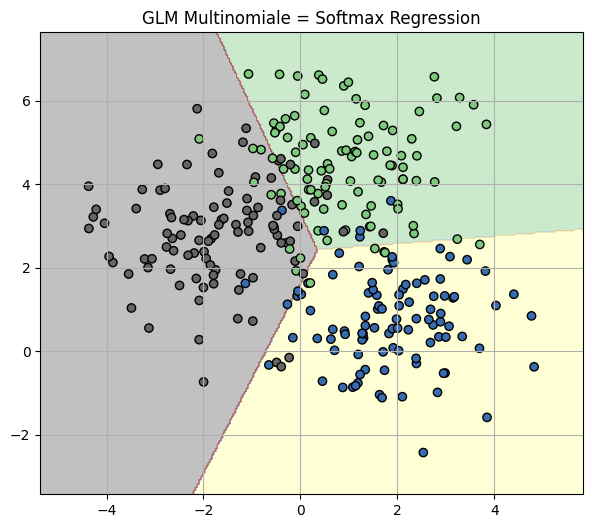

In [ ]:
# ------------------------------------------------------------
# 📘 GLM Multinomial → Softmax Regression
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ------------------------------------------------------------
# 🎯 1. Creiamo un dataset multiclasse (3 classi)
# ------------------------------------------------------------
np.random.seed(0)
X, y = make_blobs(n_samples=300,
                  centers=3,
                  n_features=2,
                  cluster_std=1.2,
                  random_state=0)

# ------------------------------------------------------------
# 🧪 2. Train/test split
# ------------------------------------------------------------
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=0)

# ------------------------------------------------------------
# 🔧 3. Multinomial Logistic Regression = Softmax Regression
# ------------------------------------------------------------
softmax = LogisticRegression(multi_class="multinomial",
                             solver="lbfgs").fit(Xtr, ytr)

print("📌 Coefficienti (uno per classe):\n", softmax.coef_)
print("📌 Bias:\n", softmax.intercept_)

# ------------------------------------------------------------
# 📈 4. Accuracy sul test
# ------------------------------------------------------------
y_pred = softmax.predict(Xte)
acc = accuracy_score(yte, y_pred)
print("🎯 Accuracy sul test:", acc)

# ------------------------------------------------------------
# 📊 5. Visualizzazione dei confini di decisione
# ------------------------------------------------------------
# meshgrid
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
probs = softmax.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, probs, alpha=0.4, cmap="Accent")
plt.scatter(X[:,0], X[:,1], c=y, cmap="Accent", edgecolor="k")
plt.title("GLM Multinomiale = Softmax Regression")
plt.grid(True)
plt.show()

# 🟧 Poisson Regression — Il GLM per i dati di conteggio

La **Poisson Regression** è il modello naturale quando il target $y$ rappresenta:

- numero di eventi osservati  
- conteggi non negativi  
- frequenze  
- rate di eventi nel tempo  

Esempi reali:

- numero di chiamate a un call center in un’ora  
- numero di incidenti in un tratto stradale  
- numero di richieste web al server  
- conteggio di cellule in un'area biologica  

---

# 1️⃣ Passo 1 — Scelta della distribuzione: Poisson

Assumiamo che, dato un input $x$, il target $y$ sia generato da una distribuzione **Poisson**:

$$
y \mid x \sim \text{Poisson}(\lambda(x))
$$

La densità è:

$$
p(y \mid x)
= \frac{\lambda(x)^y}{y!} e^{-\lambda(x)}
$$

dove:

- $ \lambda(x) > 0 $ è il **tasso di eventi attesi**
- $ y \in \{0,1,2, \dots\} $

---

# 2️⃣ Passo 2 — Riscrittura nella Famiglia Esponenziale

Ricordiamo il formato generale:

$$
p(y\mid x)=h(y)\, g(\theta(x))\,
\exp\!\big( \theta(x) \, u(y) \big)
$$

Prendiamo la Poisson:

$$
p(y \mid x)
= \frac{\lambda(x)^y}{y!} e^{-\lambda(x)}
$$

Usiamo logaritmi:

$$
p(y\mid x)
= \exp\!\big( y \ln \lambda(x) - \lambda(x) - \ln y! \big)
$$

Ora riconosciamo i pezzi:

- **statistica sufficiente**

$$
u(y)=y
$$

- **parametro naturale**

$$
\theta(x) = \ln \lambda(x)
$$

- **parte che dipende solo da $y$**

$$
h(y) = \frac{1}{y!}
$$

- **parte che dipende solo da $\theta$**

$$
g(\theta) = e^{-e^{\theta}}
$$

e infatti:

$$
\lambda(x) = e^{\theta(x)}
$$

---

# 3️⃣ Passo 3 — Nei GLM imponiamo la linearità del parametro naturale

Il vincolo fondamentale dei GLM è:

$$
\theta(x) = w^T x
$$

Sostituiamo:

$$
\ln \lambda(x) = w^T x
$$

quindi:

$$
\lambda(x) = e^{w^Tx}
$$

ed essendo:

$$
\mathbb{E}[y\mid x] = \lambda(x)
$$

abbiamo la predizione del modello:

$$
\boxed{
y(x) = \mathbb{E}[y\mid x] = e^{w^T x}
}
$$

👉 **La Regressione di Poisson produce una media esponenziale, non lineare.**

---

# 🔥 Risultato finale: Poisson Regression

$$
\boxed{
p(y\mid x)=\text{Poisson}(e^{w^T x})
}
$$

$$
\boxed{
\mathbb{E}[y\mid x]= e^{w^T x}
}
$$

---

# 🧪 Codice Python — Poisson Regression con GLM

Esempio: creiamo dati sintetici con una intensità Poisson che cresce *esponenzialmente* con $x$:


📌 Coefficienti: [0.52520172]  | Bias: 0.27651426696346804
📉 Test MSE: 6.647741289314771


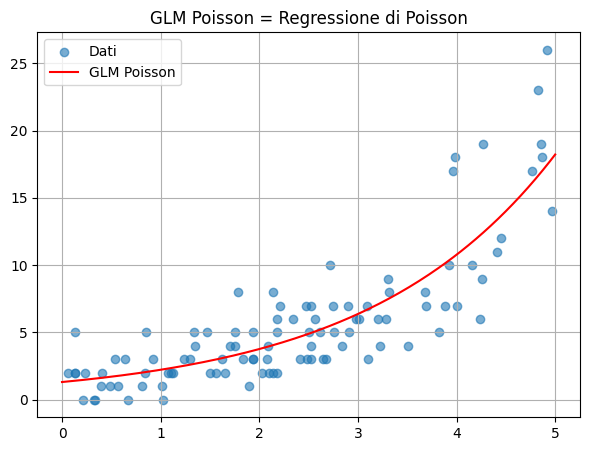

In [ ]:
# ------------------------------------------------------------
# 🎯 Dati sintetici: λ(x) = exp(0.3 + 0.5 x)
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import PoissonRegressor

np.random.seed(2)
n = 100
X = np.random.uniform(0, 5, size=(n,1))
lam = np.exp(0.3 + 0.5*X[:,0])   # intensità di Poisson
y = np.random.poisson(lam)

# Train/test
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=0)

# ------------------------------------------------------------
# 🔧 Modello GLM Poisson (link log)
# ------------------------------------------------------------
pois = PoissonRegressor(alpha=0).fit(Xtr, ytr)
print("📌 Coefficienti:", pois.coef_, " | Bias:", pois.intercept_)

# Predizione
y_pred = pois.predict(Xte)
mse = mean_squared_error(yte, y_pred)
print("📉 Test MSE:", mse)

# ------------------------------------------------------------
# 📈 Visualizzazione
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.6, label="Dati")
xx = np.linspace(0,5,200)
yy = pois.predict(xx.reshape(-1,1))
plt.plot(xx, yy, color="red", label="GLM Poisson")
plt.title("GLM Poisson = Regressione di Poisson")
plt.legend()
plt.grid()
plt.show()

# 🟨 Exponential Regression — Il GLM per i tempi di attesa (data > 0)

La **Exponential Regression** è il modello corretto quando il target $y$ rappresenta:

- un **tempo di attesa**  
- una **durata positiva**  
- un **intervallo** tra eventi Poisson  
- in generale qualunque variabile con supporto $ y > 0 $

Esempi reali:

- tempo tra arrivi a un servizio (queueing theory)  
- durata fino al guasto di un componente  
- tempo di risposta a un evento  

---

# 1️⃣ Passo 1 — Scelta della distribuzione: Exponential

Assumiamo che il dato sia generato da una distribuzione **esponenziale**:

$$
y \mid x \sim \mathrm{Exp}(\lambda(x))
$$

La densità è:

$$
p(y \mid x)
= \lambda(x) e^{-\lambda(x) y},
\qquad y > 0
$$

dove:

- $ \lambda(x) > 0 $ è il **rate** (tasso di decadimento)
- la media è:

$$
\mathbb{E}[y\mid x] = \frac{1}{\lambda(x)}
$$

---

# 2️⃣ Passo 2 — Riscrittura nella Famiglia Esponenziale

Partiamo dalla pdf:

$$
p(y \mid x)
= \lambda(x) e^{-\lambda(x) y}
$$

Scriviamola come esponenziale:

$$
p(y \mid x)
= \exp\!\big( \ln \lambda(x) - \lambda(x) y \big)
$$

Confrontiamo con la forma generale:

$$
p(y\mid x)
= h(y)\, g(\theta(x))\, e^{\theta(x)\, u(y)}
$$

e identifichiamo i pezzi.

### ✔ Statistica sufficiente
$$
u(y) = y
$$

### ✔ Parametro naturale
L’esponente contiene:

$$
-\lambda(x)y = \theta(x)\, y
$$

quindi:

$$
\theta(x) = -\lambda(x)
$$

e dunque la media è:

$$
\mathbb{E}[y\mid x] = -\frac{1}{\theta(x)}
$$

### ✔ Le altre funzioni

$$
h(y) = 1
$$

$$
g(\theta) = e^{\theta}
$$

(derivato da $ \ln \lambda = \ln(-\theta) $, ma nei GLM non ci serve esplicitarlo).

---

# 3️⃣ Passo 3 — Nei GLM imponiamo la linearità del parametro naturale

Il vincolo GLM dice:

$$
\theta(x) = w^T x
$$

Ma abbiamo:

$$
\theta(x) = -\lambda(x)
$$

mettiamole insieme:

$$
-\lambda(x) = w^T x
$$

quindi:

$$
\lambda(x) = -\, w^T x
$$

e la media è:

$$
\mathbb{E}[y\mid x] = \frac{1}{\lambda(x)}
= -\frac{1}{w^T x}
$$

---

# ⚠️ Problema: la media deve essere **positiva**

Per essere valida, la media esponenziale deve rispettare:

$$
\mathbb{E}[y\mid x] > 0
\;\;\Longleftrightarrow\;\;
w^T x < 0
$$

Nella pratica:

- si impone un **link inverso** alternativo (log-link)  
- oppure si appende un bias negativo molto grande  
- oppure si riformula il modello con supporto positivo

Per semplicità (come nelle slide) manteniamo la forma canonica GLM:

$$
\boxed{
\theta(x) = w^Tx,\quad
\lambda(x) = -w^T x,\quad
y(x)= -\frac{1}{w^T x}
}
$$

---

# 🎉 Risultato finale

La **Exponential Regression** derivata come GLM è:

$$
p(y\mid x) = \lambda(x) e^{-\lambda(x) y},
\qquad
\lambda(x) = -\, w^T x
$$

e la **predizione** del modello è:

$$
\boxed{y(x) = -\frac{1}{w^T x}}
$$

---

# 🧪 Codice Python — Exponential Regression via GLM

⚠️ **scikit-learn NON ha un estimatore ExponentialRegressor**  
→ quindi implementiamo noi la MLE.

La log–likelihood dell’esponenziale è:

$$
\ell(w)
= \sum_i \big( \ln \lambda(x_i) - \lambda(x_i)\, y_i \big)
$$

dove:

$$
\lambda(x_i) = - w^T x_i
$$

e deve essere $ w^T x_i < 0 $ per tutti i campioni.

Ecco una piccola implementazione:



Stima dei pesi: [-1.26931332 -0.39690779]


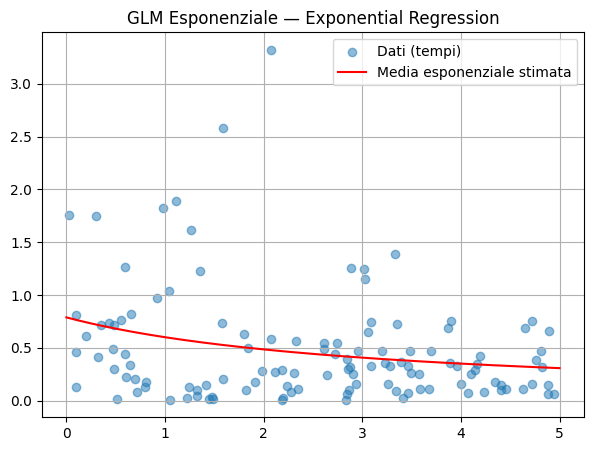

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 🎯 Dati sintetici: y ~ Exp( λ(x) = 1 + 0.5 x )
# ------------------------------------------------------------
np.random.seed(0)
n = 120
X = np.random.uniform(0, 5, size=(n,1))
lam_true = 1 + 0.5 * X[:,0]
y = np.random.exponential(scale=1/lam_true)

# Append bias
Xb = np.hstack([np.ones((n,1)), X])

# ------------------------------------------------------------
# 🔧 Definizione della negativa log-likelihood
# ------------------------------------------------------------
def neg_loglik(w):
    eta = Xb @ w           # = w0 + w1 x
    lam = -eta             # λ(x) = - w^T x
    if np.any(lam <= 0):
        return np.inf      # invalid parameters
    return -np.sum(np.log(lam) - lam * y)

# Ottimizzazione
w0 = np.array([-1.0, -0.1])   # inizializzazione (negativa!)
res = minimize(neg_loglik, w0)
w_hat = res.x
print("Stima dei pesi:", w_hat)

# ------------------------------------------------------------
# 📈 Visualizzazione
# ------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label="Dati (tempi)")
xx = np.linspace(0,5,200)
Xb2 = np.vstack([np.ones_like(xx), xx]).T
yy = -1/(Xb2 @ w_hat)   # media prevista
plt.plot(xx, yy, color="red", label="Media esponenziale stimata")
plt.title("GLM Esponenziale — Exponential Regression")
plt.legend()
plt.grid()
plt.show()

# 🔥 Riepilogo Finale — Tutti i GLM in una sola tabella

Questa tabella riassume **per ogni GLM**:

- Distribuzione scelta  
- Supporto del dato  
- Statistica sufficiente $u(y)$  
- Parametro naturale $ \eta $  
- Media $ \mathbb{E}[y\mid x] $  
- Link canonico $ g(\mu)=\eta $  
- Predizione $ y(x) $  
- Modello risultante  

---

## 🧠 Tabella completa

| Modello | Distribuzione | Supporto | Statistica suff. $u(y)$ | Parametro naturale $ \eta(\mu) $ | $$Media  \mu=\mathbb{E}[y\mid x] $$ | Link canonico $ g(\mu) $ | Forma del GLM $ \eta(x)=w^T x $ | Predizione finale $ y(x) $ |
|---------|---------------|----------|----------------------------|--------------------------------------|-------------------------------------|------------------------------|-----------------------------------|--------------------------------|
| **Regressione lineare** | Normale $ \mathscr{N}(\mu,\sigma^2) $ | $ y\in\mathbb{R} $ | $ y $ (o $ (y,y^2) $) | $ \mu/\sigma^2 $ | $ \mu $ | identità | $ \mu(x)=w^T x $ | $ y(x)=w^Tx $ |
| **Regressione logistica** | Bernoulli | $0,1$ | $ y $ | $ \log\frac{\mu}{1-\mu} $ | $ \mu=p(y=1\mid x) $ | logit | $ \log\frac{\mu}{1-\mu}=w^Tx $ | $ y(x)=\sigma(w^Tx) $ |
| **Softmax regression** | Multinomiale (Categorical) | $1,\dots,K$ | one-hot | $ \log\pi_k $ | $ \pi_k $ | softmax inverse | $ \theta_k=w_k^Tx $ | $ y_k(x)=\frac{e^{w_k^Tx}}{\sum_j e^{w_j^Tx}} $ |
| **Poisson regression** | Poisson | $$ 0,1,2,\dots $$ | $ y $ | $ \log\lambda $ | $ \mu=\lambda $ | log | $ \log\lambda(x)=w^Tx $ | $ y(x)=e^{w^Tx} $ |
| **Exponential regression** | Esponenziale | $ y>0 $ | $ y $ | $ -\lambda $ | $ \mu=\frac{1}{\lambda} $ | inverse (canonico) | $ -\lambda(x)=w^Tx $ | $ y(x)=-\frac{1}{w^Tx} $ |

---

## 📝 Note importanti

- I GLM **non** impongono la forma dell’output: impongono la forma del **parametro naturale**.  
- Il link canonico nasce *automaticamente* dalla riscrittura della distribuzione nella **famiglia esponenziale**.  
- La predizione del modello GLM è sempre:  
  $$
  y(x) = \mathbb{E}[u(y)\mid x]
  $$
  dove $u(y)$ è la statistica sufficiente.
- Bernoulli → sigmoid  
- Multinomiale → softmax  
- Poisson → esponenziale  
- Exponential → inverso di una funzione lineare (se si usa il link canonico)


---

# 📘 GLM e Newton–Raphson (IRLS): il legame fondamentale

In questa sezione vogliamo capire **come si stimano i parametri** di un Generalized Linear Model (GLM).  
Ricordiamo che un GLM si basa su tre elementi:

1. una distribuzione della **famiglia esponenziale** per $ y \mid x $  
2. la media del modello $ \mu = \mathbb{E}[u(y) \mid x] $  
3. un **parametro naturale lineare** nell’input:  
   $$
   \theta(x) = w^T x.
   $$

Ora la domanda è:

> **Come troviamo i pesi $ w $?**

La risposta passa attraverso la **massima verosimiglianza** e un algoritmo fondamentale:  
**Newton–Raphson**, che assume una forma speciale nei GLM chiamata  
**IRLS – Iteratively Reweighted Least Squares**.

---

## 1. Massima verosimiglianza nei GLM

Data una distribuzione della famiglia esponenziale:

$$
p(y\mid x)
= h(y)\, g(\theta(x)) \exp\big( \theta(x)\, u(y)\big),
$$

la log-verosimiglianza di un dataset è:

$$
\ell(w) = \sum_{i=1}^n \log p(y_i \mid x_i).
$$

Stimare i pesi significa risolvere:

$$
w^* = \arg\max_w \,\ell(w).
$$

---

## 2. Proprietà fondamentale: concavità

Nei GLM la log-verosimiglianza è **sempre concava** in $ w $.  
Questo implica:

- esiste un **unico massimo globale**  
- Newton–Raphson **converge rapidamente**  
- la struttura del problema è estremamente regolare  

---

## 3. Gradiente e Hessiana della log-verosimiglianza

Un risultato cruciale dei GLM è che:

$$
\nabla \ell(w) = X^T (y - \mu),
$$

dove:

- $ X $ è la matrice dei dati  
- $ y $ è il vettore delle osservazioni  
- $ \mu = \mathbb{E}[u(y)\mid x] $ sono le predizioni del modello  

L’Hessiana ha la forma:

$$
H = - X^T W X,
$$

dove $ W $ è una matrice diagonale che contiene la **varianza della distribuzione**.

**Questo è il cuore matematico dei GLM:**  
l’Hessiana assume sempre la forma *quadratica* $ X^T W X $.

---

## 4. Newton–Raphson

L’aggiornamento generale di Newton–Raphson è:

$$
w_{\text{nuovo}} =
w_{\text{vecchio}}
- H^{-1}\, \nabla \ell.
$$

Sostituendo gradiente e Hessiana dei GLM otteniamo:

$$
w_{\text{nuovo}}
= (X^T W X)^{-1} X^T W z,
$$

dove:

$$
z = Xw + W^{-1}(y - \mu)
$$

si chiama **variabile risposta aggiustata** (*adjusted response*).

---

## 5. IRLS – Iteratively Reweighted Least Squares

La formula precedente mostra che ogni iterazione di Newton diventa:

> **una regressione lineare pesata**, con pesi dati da $ W $.

L’algoritmo IRLS è proprio questo:

1. scegli un valore iniziale di $ w $
2. calcola la media $ \mu $
3. costruisci $ W $ usando la varianza della distribuzione
4. calcola la risposta aggiustata $ z $
5. risolvi  
   $$
   w_{\text{nuovo}} = (X^T W X)^{-1}X^T W z
   $$
6. ripeti finché non converge

IRLS è un caso speciale di Newton–Raphson **che appare automaticamente nei GLM**.

---

## 6. I pesi $ W $ per i principali GLM

| Modello | Media $ \mu $ | Varianza | Peso IRLS $ W_i $ |
|--------|------------------|----------|----------------------|
| **Gaussiano** | $ \mu $ | $ \sigma^2 $ | costante |
| **Logistico** | $$ \sigma(w^Tx) $$ | $ \mu(1-\mu) $ | $$ W_i = \mu_i (1-\mu_i) $$ |
| **Poisson** | $ e^{w^Tx} $ | $ \mu $ | $ W_i = \mu_i $ |
| **Softmax** | softmax | jacobiana | matrice completa |

---

## 7. Perché IRLS è importante?

Perché mostra che:

> **Tutti i GLM sono regressioni lineari “nascoste”, con pesi che cambiano ad ogni iterazione.**

Questo unifica completamente la famiglia GLM:

- stessa struttura probabilistica  
- stessa log-verosimiglianza concava  
- stesso algoritmo di ottimizzazione  

Cambiano **solo i pesi $ W $**, determinati dalla varianza della distribuzione scelta.

---

## 8. Perché non usiamo sempre IRLS?

Svantaggi:

- richiede invertire la matrice $ X^T W X $ ad ogni iterazione  
- costo $ O(d^3) $, problematico in alta dimensione  
- in ML moderno si preferiscono ottimizzatori come **L-BFGS, SAG, SAGA, SGD, Adam**

Tuttavia:

- per dataset piccoli e medi IRLS è estremamente preciso  
- è lo standard in **R** e **statsmodels**

---

## 9. Messaggio chiave

Se devi ricordare una sola cosa:

> **I GLM si stimano con Newton–Raphson, che nei GLM diventa IRLS.  
> Questo accade perché la famiglia esponenziale rende l’Hessiana sempre della forma $ X^T W X $.**

È questa struttura che unifica regressione lineare, logistica, Poisson, softmax, ecc.  
Tutti i GLM sono, essenzialmente, **regressioni lineari pesate iterate**.

---